<h2>Import bibliotek</h2>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h2>Zadanie 1.</h2>

<h4>Pochodne tangensa</h4>

In [2]:
# 1st derivative of tan
def dtan_dx(x):
    return 1 + np.tan(x)**2

# 2nd derivative of tan
def d2tan_dx2(x):
    return 2*np.tan(x) * dtan_dx(x)

# 3rd derivative of tan
def d3tan_dx3(x):
    return 2*(dtan_dx(x)**2) + 2*np.tan(x) * d2tan_dx2(x)

<h4>Wartość x i wartości h</h4>

In [3]:
# x value
x = 1
# h spacings
h_spacings = np.array([10**-i for i in range(0,17)])


<h4>Prawidłowa wartość pochodnej tangensa</h4>

In [4]:
# correct value
correct_val = dtan_dx(x)

<h4>Wartość $\epsilon$</h4>

In [5]:
# epsilon
eps = 1.0
while eps + 1 > 1:
    eps /= 2
eps *= 2

<h3>1.1 Różnica prawostronna</h3>

<h4>Definicja pochodnej</h4>

In [6]:
# return a function f(x,h) calculating a forward difference
def df_dx_forward(f):
    return lambda x, h: (f(x+h) - f(x)) / h

<h4>Porównanie wartości obliczonych z wartością prawdziwą</h4>

Obliczenie wartości oraz ich błędów

In [7]:
# computed values
dtan_dx_forward = df_dx_forward(np.tan)
comp_vals_forward = dtan_dx_forward(x, h_spacings)

# computational errors
comp_errs_forward = np.abs(correct_val - comp_vals_forward)

# truncation errors
M_forward = np.abs(d2tan_dx2(x))
trunc_errs_forward = M_forward * h_spacings / 2

# rounding errors
round_errs_forward = 2 * eps / h_spacings

Pokazanie błędów na wykresie

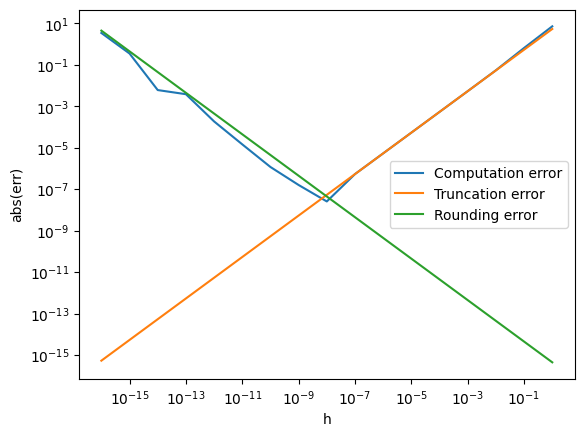

In [8]:
# set log scale
plt.xscale("log")
plt.yscale("log")
# add plots
plt.plot(h_spacings, comp_errs_forward, label="Computation error")
plt.plot(h_spacings, trunc_errs_forward, label="Truncation error")
plt.plot(h_spacings, round_errs_forward, label="Rounding error")
# add labels
plt.xlabel("h")
plt.ylabel("abs(err)")
# show with legend
plt.legend()
plt.show()

<h4>Porównanie minimalnego błędu obliczeniowego z podanych h z błędem dla h<sub>min</sub></h4>

In [9]:
# minimal computational error for given h spacings
given_min_h_forward, given_min_error_forward = min([(h_spacings[i], comp_errs_forward[i]) for i in range(len(h_spacings))], key=lambda x: x[1])
# computational error for h_min
calc_min_h_forward = 2 * np.sqrt(eps/M_forward)
calc_min_error_forward = np.abs(correct_val - dtan_dx_forward(x, calc_min_h_forward))
# print out the comparison
print(f"Minimalny błąd obliczeniowy dla danych wartości h: {given_min_error_forward}\n\tdla h = {given_min_h_forward}")
print(f"Błąd obliczeniowy dla h_min: {calc_min_error_forward}\n\tdla h_min = {calc_min_h_forward}")
print(f"Iloraz minimalnego błędu z podanych wartości h do błędu dla h_min: {given_min_error_forward / calc_min_error_forward}")

Minimalny błąd obliczeniowy dla danych wartości h: 2.554135258847623e-08
	dla h = 1e-08
Błąd obliczeniowy dla h_min: 1.8287692249430165e-08
	dla h_min = 9.123695225180451e-09
Iloraz minimalnego błędu z podanych wartości h do błędu dla h_min: 1.3966416451081785


<h3>1.2 Różnica centralna</h3>

<h4>Definicja pochodnej</h4>

In [10]:
# return a function f(x,h) calculating a central difference
def df_dx_central(f):
    return lambda x, h: (f(x+h) - f(x-h)) / (2*h)

<h4>Porównanie wartości obliczonych z wartością prawdziwą</h4>

Obliczenie wartości oraz ich błędów

In [11]:
# computed values
dtan_dx_central = df_dx_central(np.tan)
comp_vals_central = dtan_dx_central(x, h_spacings)

# computational errors
comp_errs_central = np.abs(correct_val - comp_vals_central)

# truncation errors
M_central = np.abs(d3tan_dx3(x))
trunc_errs_central = M_central * h_spacings**2 / 6

# rounding errors
round_errs_central = eps / h_spacings

Pokazanie błędów na wykresie

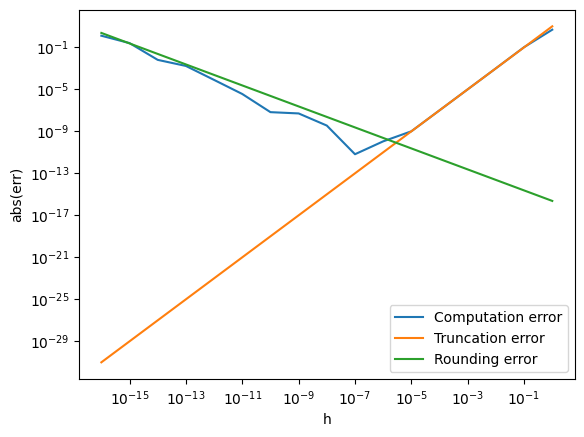

In [12]:
# set log scale
plt.xscale("log")
plt.yscale("log")
# add plots
plt.plot(h_spacings, comp_errs_central, label="Computation error")
plt.plot(h_spacings, trunc_errs_central, label="Truncation error")
plt.plot(h_spacings, round_errs_central, label="Rounding error")
# add labels
plt.xlabel("h")
plt.ylabel("abs(err)")
# show with legend
plt.legend()
plt.show()

<h4>Porównanie minimalnego błędu obliczeniowego z podanych h z błędem dla h<sub>min</sub></h4>

In [13]:
# minimal computational error for given h spacings
given_min_h_central, given_min_error_central = min([(h_spacings[i], comp_errs_central[i]) for i in range(len(h_spacings))], key=lambda x: x[1])
# computational error for h_min
calc_min_h_central = np.cbrt(3*eps/M_central)
calc_min_error_central = np.abs(correct_val - dtan_dx_central(x, calc_min_h_central))
# print out the comparison
print(f"Minimalny błąd obliczeniowy dla danych wartości h: {given_min_error_central}\n\tdla h = {given_min_h_central}")
print(f"Błąd obliczeniowy dla h_min: {calc_min_error_central}\n\tdla h_min = {calc_min_h_central}")
print(f"Iloraz minimalnego błędu z podanych wartości h do błędu dla h_min: {given_min_error_central / calc_min_error_central}")

Minimalny błąd obliczeniowy dla danych wartości h: 6.2230220976289274e-12
	dla h = 1e-07
Błąd obliczeniowy dla h_min: 8.678568974573864e-11
	dla h_min = 2.273274156839061e-06
Iloraz minimalnego błędu z podanych wartości h do błędu dla h_min: 0.07170562469297527


<h3>1.3 Porównanie obu metod</h3>

In [14]:
# print out comparison of two methods
print(f"Błąd obliczeniowy różnicy prawostronnej dla h_min: {calc_min_error_forward}\n\tdla h_min = {calc_min_h_forward}")
print(f"Błąd obliczeniowy różnicy centralnej dla h_min: {calc_min_error_central}\n\tdla h_min = {calc_min_h_central}")
print(f"Iloraz błędu metody prawostronnej do metody centralnej: {calc_min_error_forward / calc_min_error_central}")

Błąd obliczeniowy różnicy prawostronnej dla h_min: 1.8287692249430165e-08
	dla h_min = 9.123695225180451e-09
Błąd obliczeniowy różnicy centralnej dla h_min: 8.678568974573864e-11
	dla h_min = 2.273274156839061e-06
Iloraz błędu metody prawostronnej do metody centralnej: 210.72243941378747
